# Joyo Kanji (คันจิในชีวิตประจำวัน 2,136 ตัว)
### พิสิษฐ์ เขื่อนสุวรรณ (6510422022)

# 1.Import Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Pandas 1.5.3
NumPy 1.20.3
Matplotlib 3.6.3
Seaborn 0.12.2


C:\Users\th100260\AppData\Local\Temp\ipykernel_28988\255201625.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 2. Prepare Data

## 2.1 Import Data

In [2]:
#ตารางที่ 1: คันจิในชีวิตประจำวัน + ข้อมูลคันจิ JLPT แบบเก่าและใหม่

kanji = pd.read_json('https://raw.githubusercontent.com/davidluzgouveia/kanji-data/master/kanji-jouyou.json')
kanji = kanji.T.reset_index()
kanji.head()

,index,strokes,grade,freq,jlpt_old,jlpt_new,meanings,readings_on,readings_kun,wk_level,wk_meanings,wk_readings_on,wk_readings_kun,wk_radicals
0,一,1,1,2,4,5,"[One, One Radical (no.1)]","[いち, いつ]","[ひと-, ひと.つ]",1,[One],"[いち, いつ]",[!ひと],[Ground]
1,二,2,1,9,4,5,"[Two, Two Radical (no. 7)]","[に, じ]","[ふた, ふた.つ, ふたたび]",1,[Two],[に],[!ふた],[Two]
2,九,2,1,55,4,5,[Nine],"[きゅう, く]","[ここの, ここの.つ]",1,[Nine],"[く, きゅう]",[!ここの],[Nine]
3,七,2,1,115,4,5,[Seven],[しち],"[なな, なな.つ, なの]",1,[Seven],[しち],"[!なな, !なの]",[Seven]
4,人,2,1,5,4,5,[Person],"[じん, にん]","[ひと, -り, -と]",1,[Person],"[にん, じん]","[!ひと, !と]",[Person]


In [3]:
#ตารางที่ 2: คันจิในชีวิตประจำวัน + ข้อมูลความถี่ในการปรากฎในหนังสือพิมพ์ไมนิจิ (毎日新聞) ช่วงปี 2000-2010

mainichi = pd.read_csv('KanjiTable.csv')
mainichi.head()

,id,Kanji,Strokes,Grade,Kanji Classification,JLPT-test,Name of Radical,Radical Freq.,Reading within Joyo,Reading beyond Joyo,...,Right3sound,Right3freq,Right4sound,Right4freq,Right5sound,Right5freq,Right6sound,Right6freq,Right7sound,Right7freq
0,1,亜,7,7,象形 Pictographic,1,Ni,6,ア,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,2,哀,9,7,会意 Com. Ideographic,1,"Kuchi, Kuchihen",70,アイ、あわ-れ、あわ-れむ,かな,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,3,挨,10,7,形声 Phonetic,0,Tehen,89,アイ,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,4,愛,13,4,会意 Com. Ideographic,3,"Kokoro, Risshinben, Shitagokoro",76,アイ,オ、いと、め,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,5,曖,17,7,形声 Phonetic,0,"Nichi, Nichihen",38,アイ,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [4]:
#ตารางที่ 3: ข้อมูลความถี่ของคันจิผสม 2 ตัวที่ปรากฎในหนังสือพิมพ์ไมนิจิ (毎日新聞) ช่วงปี 2000-2010

jukugo = pd.read_csv('JukugoTable.csv',';')
jukugo.head()

C:\Users\th100260\AppData\Local\Temp\ipykernel_28988\2392299256.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  jukugo = pd.read_csv('JukugoTable.csv',';')


,id,Comp. Word,Frequency,Grammatical Feature,Pronunciation,English Translation
0,1,問題,238663,adjective stem for -nai negation,mondai,question
1,2,首相,224822,general noun,syusyoo,Prime Minister
2,3,写真,211918,general noun,syasin,photograph
3,4,現在,193742,possible to use as an adverb,genzai,now
4,5,世界,183195,general noun,sekai,the world


## 2.2 Cleanse & Reshape Data

In [5]:
#ตารางที่ 1: คันจิในชีวิตประจำวัน + ข้อมูลคันจิ JLPT แบบเก่าและใหม่
kanji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            2136 non-null   object
 1   strokes          2136 non-null   object
 2   grade            2136 non-null   object
 3   freq             2039 non-null   object
 4   jlpt_old         1979 non-null   object
 5   jlpt_new         1964 non-null   object
 6   meanings         2136 non-null   object
 7   readings_on      2136 non-null   object
 8   readings_kun     2136 non-null   object
 9   wk_level         1963 non-null   object
 10  wk_meanings      1963 non-null   object
 11  wk_readings_on   1963 non-null   object
 12  wk_readings_kun  1963 non-null   object
 13  wk_radicals      1963 non-null   object
dtypes: object(14)
memory usage: 233.8+ KB


In [6]:
#เติมระดับ JLPT ให้คันจิที่ไม่มีด้วย 0 แทนว่าอยู่นอกเหนือข้อสอบ
kanji['jlpt_old'].fillna(0, inplace=True)
kanji['jlpt_new'].fillna(0, inplace=True)

#เอา column freq (จัดลำดับความถี่ในการใข้งานคันจิแต่ละตัว แต่ไม่มีข้อมูลซัพพอร์ตความถี่และมีค่า Null)
#และ column wk ทั้งหมดออก (WaniKani ไม่ใช่ระดับการเรียนภาษาญี่ปุ่นที่เป็นที่นิยมในไทย)
kanji = kanji.iloc[:,[0,1,4,5,6,7,8]]
kanji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         2136 non-null   object
 1   strokes       2136 non-null   object
 2   jlpt_old      2136 non-null   int64 
 3   jlpt_new      2136 non-null   int64 
 4   meanings      2136 non-null   object
 5   readings_on   2136 non-null   object
 6   readings_kun  2136 non-null   object
dtypes: int64(2), object(5)
memory usage: 116.9+ KB


In [7]:
#ตารางที่ 2: คันจิในชีวิตประจำวัน + ข้อมูลความถี่ในการปรากฎในหนังสือพิมพ์ไมนิจิ (毎日新聞) ช่วงปี 2000-2010
mainichi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 68 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               2136 non-null   int64  
 1   Kanji                                            2136 non-null   object 
 2   Strokes                                          2136 non-null   int64  
 3   Grade                                            2136 non-null   int64  
 4   Kanji Classification                             2136 non-null   object 
 5   JLPT-test                                        2136 non-null   int64  
 6   Name of Radical                                  2136 non-null   object 
 7   Radical Freq.                                    2136 non-null   int64  
 8   Reading within Joyo                              2136 non-null   object 
 9   Reading beyond Joyo           

In [8]:
#ตรวจสอบข้อมูล Null ของ column ที่คาดว่าจะนำไปใช้งาน

#On within Joyo
mainichi.iloc[:,[1,8,10,15,11,17]][mainichi['On within Joyo'].isnull()]

,Kanji,Reading within Joyo,# of On,# of Kun within Joyo with inflections,On within Joyo,Kun within Joyo
1574,軟,ナン、やわ-らか、やわ-らかい,1,2,NaN,"yawa(raka), yawa(rakai)"
1575,難,ナン、かた-い、むずか-しい,1,2,NaN,"kata(i), muzuka(shii)"


In [9]:
#Translation of Kun

mainichi.iloc[:,[1,8,14,19]][mainichi['Translation of Kun'].isnull()]

,Kanji,Reading within Joyo,Translation of On,Translation of Kun
1216,双,ソウ、ふた,a pair; a set; comparison; counter for pairs,NaN
1797,弊,ヘイ,"evil, abuse, vice, bad custom; breakage; our (...",NaN


In [10]:
#ตรวจสอบลักษณะข้อมูลของ Translation of Kun
mainichi.iloc[:,[1,8,14,19]]

,Kanji,Reading within Joyo,Translation of On,Translation of Kun
0,亜,ア,"rank next, come after, Asia, sub-, -ous (in ac...",-
1,哀,アイ、あわ-れ、あわ-れむ,"pity, have mercy on, sympathize with","pity, have mercy on, sympathize with, grief, s..."
2,挨,アイ,push open,-
3,愛,アイ,"love, affection, favorite",-
4,曖,アイ,dark; not clear,-
...,...,...,...,...
2131,脇,わき,"the other way; another place; side, armpit, fl...","the other way; another place; side, armpit, fl..."
2132,惑,ワク、まど-う,"be perplexed, be in doubt, hesitate, vacillate...","be perplexed, be in doubt, hesitate, vacillate..."
2133,枠,わく,-,"frame, framework; reel, spindle, spool; rim, b..."
2134,湾,ワン,"gulf, bay, inlet",-


In [11]:
mainichi['Reading beyond Joyo'].fillna('-', inplace=True)
mainichi['On within Joyo'].fillna('nan', inplace=True)
mainichi.fillna({'Translation of Kun': {1216: mainichi.iloc[1797,14] , 1797:'-'}},inplace=True)

mainichi = mainichi.iloc[:, 0:21]
mainichi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   id                                        2136 non-null   int64 
 1   Kanji                                     2136 non-null   object
 2   Strokes                                   2136 non-null   int64 
 3   Grade                                     2136 non-null   int64 
 4   Kanji Classification                      2136 non-null   object
 5   JLPT-test                                 2136 non-null   int64 
 6   Name of Radical                           2136 non-null   object
 7   Radical Freq.                             2136 non-null   int64 
 8   Reading within Joyo                       2136 non-null   object
 9   Reading beyond Joyo                       2136 non-null   object
 10  # of On                                   2136 n

In [12]:
#ตารางที่ 3: ข้อมูลความถี่ของคันจิผสม 2 ตัวที่ปรากฎในหนังสือพิมพ์ไมนิจิ (毎日新聞) ช่วงปี 2000-2010
jukugo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27950 entries, 0 to 27949
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   27950 non-null  int64 
 1   Comp. Word           27950 non-null  object
 2   Frequency            27950 non-null  int64 
 3   Grammatical Feature  27950 non-null  object
 4   Pronunciation        27950 non-null  object
 5   English Translation  27915 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [13]:
#แก้ English Translation เป็น -
jukugo['English Translation'].fillna('-', inplace=True)

jukugo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27950 entries, 0 to 27949
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   27950 non-null  int64 
 1   Comp. Word           27950 non-null  object
 2   Frequency            27950 non-null  int64 
 3   Grammatical Feature  27950 non-null  object
 4   Pronunciation        27950 non-null  object
 5   English Translation  27950 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


## 2.3 Merge Data

In [14]:
#ตรวจสอบความเสนอกันของคันจิในชีวิตประจำวันของตารางที่ 1 และตารางที่ 2

display(kanji[~kanji['index'].isin(mainichi['Kanji'])])
display(mainichi[~mainichi['Kanji'].isin(kanji['index'])])

,index,strokes,jlpt_old,jlpt_new,meanings,readings_on,readings_kun
2134,塡,13,0,0,"[Fill In, Fill Up, Make Good]","[てん, ちん]","[はま.る, うず.める, は.める, ふさ.ぐ]"
2135,頰,16,0,0,"[Cheeks, Jaw]",[きょう],"[ほお, ほほ]"


,id,Kanji,Strokes,Grade,Kanji Classification,JLPT-test,Name of Radical,Radical Freq.,Reading within Joyo,Reading beyond Joyo,...,On within Joyo,Kanji ID in Nelson,# of Meanings of On,Translation of On,# of Kun within Joyo with inflections,# of Kun within Joyo without inflections,Kun within Joyo,# of Meanings of Kun,Translation of Kun,Year of Inclusion
1478,1479,填,13,7,形声 Phonetic,0,"Tsuchi, Tsuchihen",50,テン,-,...,ten,1071,5,"go into, fit into; fall into, plunge into; be ...",0,0,-,0,-,2010
1873,1874,頬,16,7,形声 Phonetic,0,Oogai,22,ほお,キョウ、ほほ,...,hoo,6637,1,cheek,0,0,-,0,-,2010


In [15]:
#แก้ไขคันจิให้ตรงกัน
kanji.loc[2134,'index'] = '填'
kanji.loc[2135,'index'] = '頬'

#รีเช็คอีกครั้งว่ายังมีข้อมูลคันจิที่ยังไม่ตรงกันหรือไม่
kanji[~kanji['index'].isin(mainichi['Kanji'])]

,index,strokes,jlpt_old,jlpt_new,meanings,readings_on,readings_kun


In [16]:
#Merge Dataframe ของตารางที่ 1 และ 2 ด้วยคันจิ
m_kanji = pd.merge(kanji[['index','jlpt_old','jlpt_new']], mainichi[:], left_on='index', right_on='Kanji')

#Drop Column ซ้ำ
m_kanji = m_kanji.drop(['id','Kanji'], axis=1)

m_kanji

,index,jlpt_old,jlpt_new,Strokes,Grade,Kanji Classification,JLPT-test,Name of Radical,Radical Freq.,Reading within Joyo,...,On within Joyo,Kanji ID in Nelson,# of Meanings of On,Translation of On,# of Kun within Joyo with inflections,# of Kun within Joyo without inflections,Kun within Joyo,# of Meanings of Kun,Translation of Kun,Year of Inclusion
0,一,4,5,1,1,指事 Ideographic,5,Ichi,14,イチ、イツ、ひと、ひと-つ,...,"ichi, \titsu",1,2,"one, a",2,1,"hito, hito(tsu)",5,"one, a unit; the same; just; once",1981
1,二,4,5,2,1,指事 Ideographic,5,Ni,6,ニ、ふた、ふた-つ,...,ni,72,2,"two, second",2,1,"futa, futa(tsu)",1,two,1981
2,九,4,5,2,1,象形 Pictographic,5,"Otsu, Otsunyoo",7,キュウ、ク、ここの、ここの-つ,...,"kyuu, \tku",57,1,nine,2,1,"kokono, kokono(tsu)",1,nine,1981
3,七,4,5,2,1,仮借 Loan,5,Ichi,14,シチ、なな、なな-つ、[なの],...,shichi,3,1,seven,3,2,"nana, nana(tsu), [nano]",1,seven,1981
4,人,4,5,2,1,象形 Pictographic,5,"Hito, Ninben, Hitoyane",104,ジン、ニン、ひと,...,"jin, \tnin",99,3,"man, person, people",1,1,hito,13,"man, human being, mankind, person, people; cha...",1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,踪,0,0,15,7,形声 Phonetic,0,"Ashi, Ashihen",11,ソウ,...,soo,5887,3,"remains (of something); clue, footprint",0,0,-,0,-,2010
2132,辣,0,0,14,7,形声 Phonetic,0,Karai,3,ラツ,...,ratsu,6001,1,bitter,0,0,-,0,-,2010
2133,錮,0,0,16,7,形声 Phonetic,0,"Kane, Kanehen",33,コ,...,ko,6285,1,to tie,0,0,-,0,-,2010
2134,填,0,0,13,7,形声 Phonetic,0,"Tsuchi, Tsuchihen",50,テン,...,ten,1071,5,"go into, fit into; fall into, plunge into; be ...",0,0,-,0,-,2010


In [17]:
m_kanji.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 0 to 2135
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   index                                     2136 non-null   object
 1   jlpt_old                                  2136 non-null   int64 
 2   jlpt_new                                  2136 non-null   int64 
 3   Strokes                                   2136 non-null   int64 
 4   Grade                                     2136 non-null   int64 
 5   Kanji Classification                      2136 non-null   object
 6   JLPT-test                                 2136 non-null   int64 
 7   Name of Radical                           2136 non-null   object
 8   Radical Freq.                             2136 non-null   int64 
 9   Reading within Joyo                       2136 non-null   object
 10  Reading beyond Joyo                       2136 n

# 3. Data Analysis/Visualization
## 3.1 คันจิในชีวิตประจำวันกับระดับการศึกษา

In [18]:
#ประเด็นที่ 1: เปรียบเทียบจำนวนคันจิแยกตามระดับการศึกษาญี่ปุ่น กับ จำนวนคันจิแยกตามระดับ JLPT ว่าสอดคล้องกันหรือไม่?
#สามารถอ้างอิงความเหมาะสมในการเรียนการสอนภาษาญี่ปุ่นสำหรับต่างชาติเทียบกับหลักสูตรการศึกษามาตราฐานของญี่ปุ่นได้หรือไม่?

#เตรียมข้อมูลสำหรับพลอตกราฟจำนวนคันจิแยกตามระดับการศึกษา
edu_kanji = m_kanji['Grade'].value_counts().reset_index()
edu_kanji.columns = ['Grade','Total (Kanji)']
edu_kanji.sort_values(['Grade'], ascending=[True],inplace=True)
edu_kanji.reset_index(drop=True)

,Grade,Total (Kanji)
0,1,80
1,2,160
2,3,200
3,4,200
4,5,185
5,6,181
6,7,1130


In [19]:
##เตรียมข้อมูลสำหรับพลอตกราฟจำนวนคันจิแยกตามระดับ JLPT
jlpt_kanji = m_kanji['jlpt_new'].value_counts().reset_index()
jlpt_kanji.columns = ['JLPT Level','Total (Kanji)']
jlpt_kanji.sort_values(['JLPT Level'], ascending=[False],inplace=True)
jlpt_kanji.reset_index(drop=True)

,JLPT Level,Total (Kanji)
0,5,79
1,4,166
2,3,367
3,2,367
4,1,985
5,0,172


<function matplotlib.pyplot.show(close=None, block=None)>

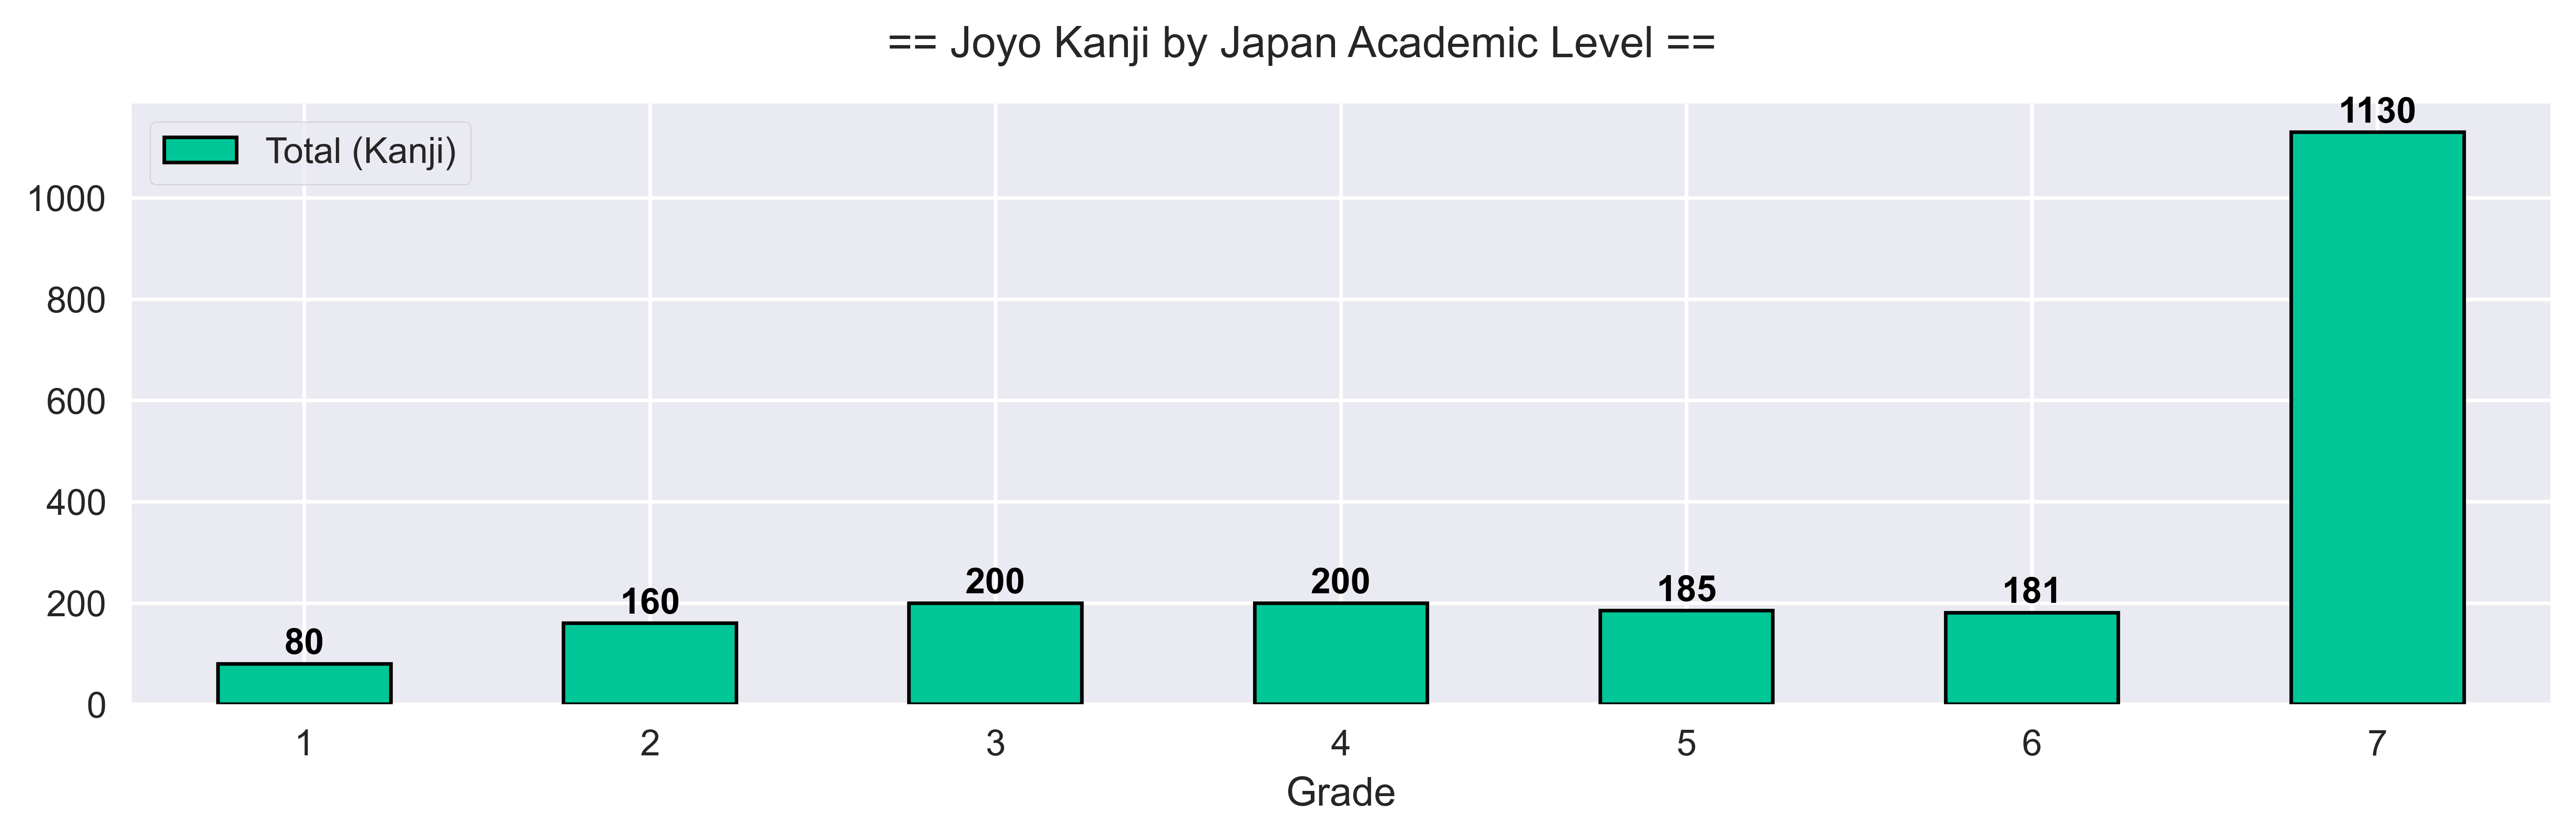

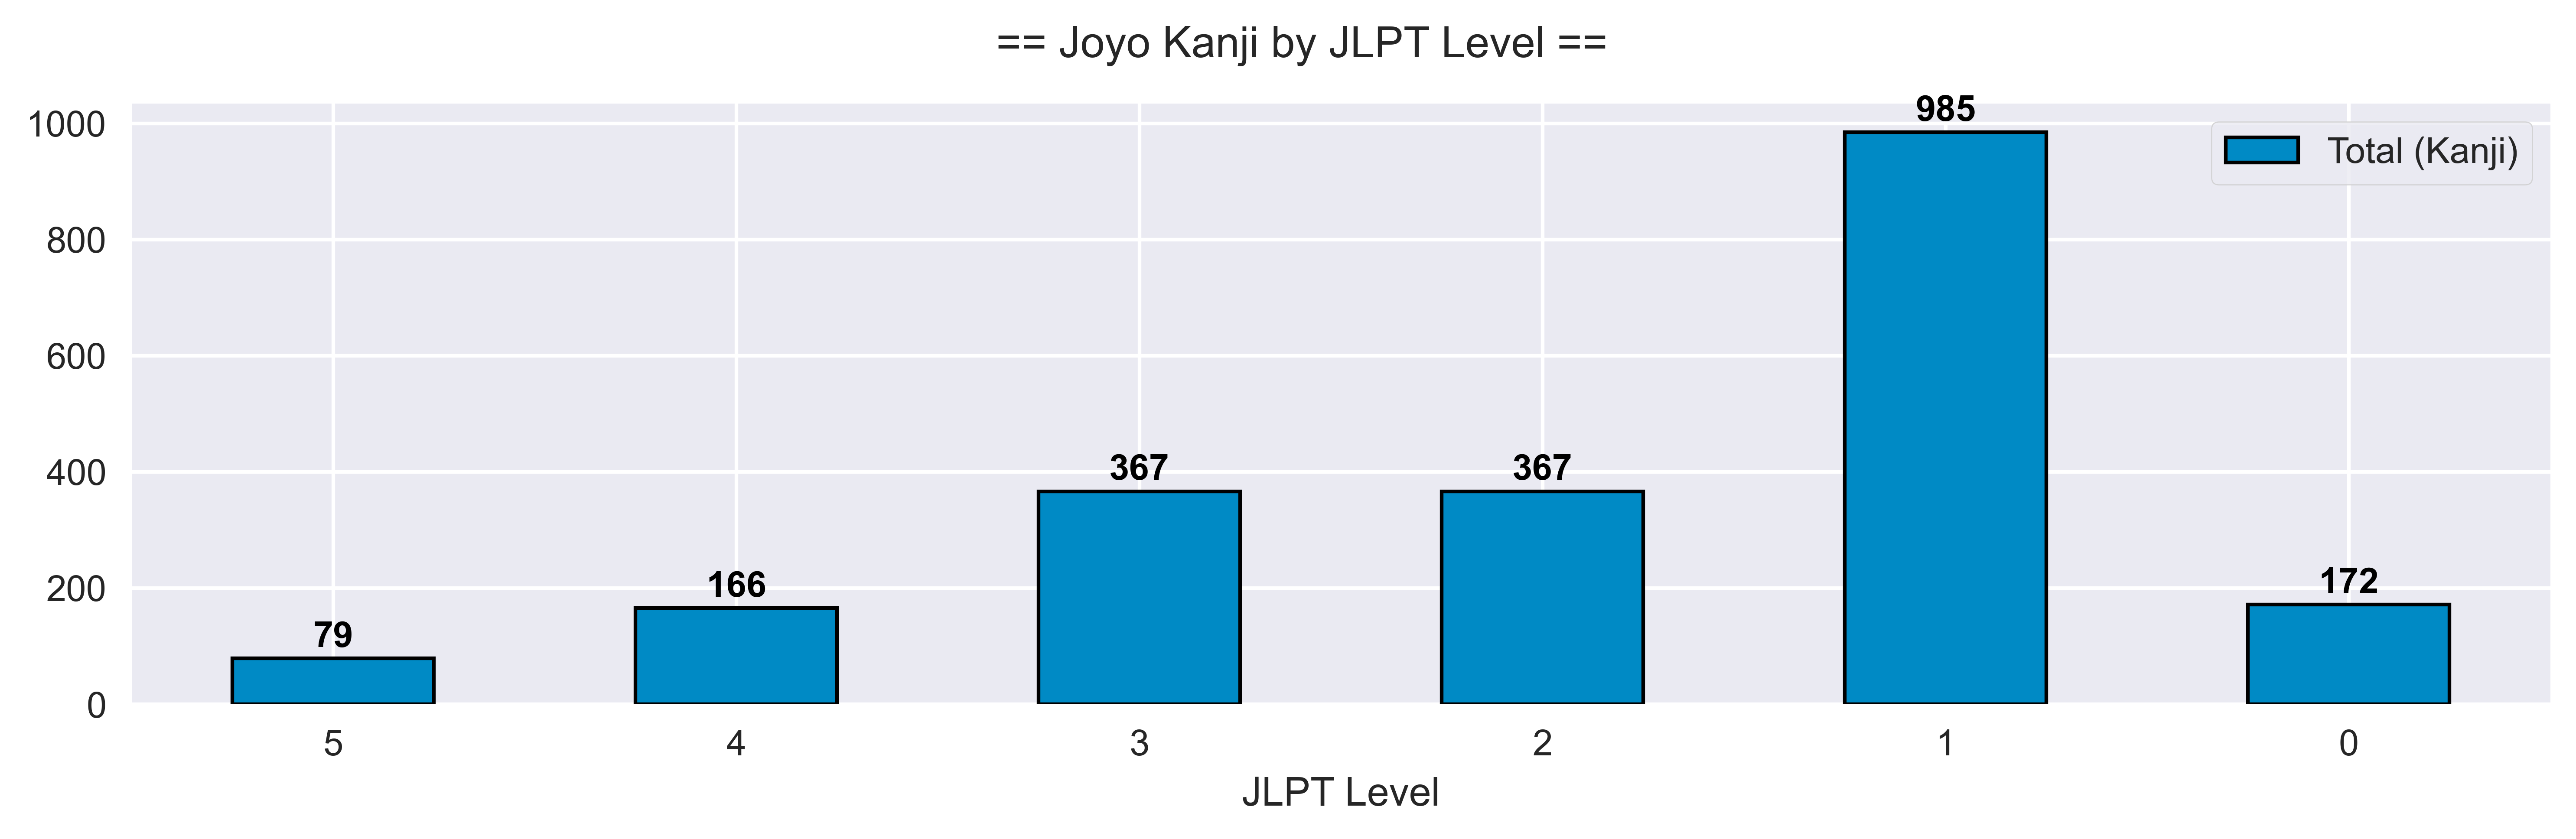

In [20]:
plt.figure(figsize=(12,3),dpi=600)
ax = plt.gca()

edu_kanji.plot(kind='bar', ax=ax, x='Grade',y='Total (Kanji)', color='#00C698',edgecolor='black', linewidth=1)
for i, v in enumerate(edu_kanji['Total (Kanji)']):
    ax.text(i, v + 20, str(v), ha='center', color='black', fontweight='bold')
plt.suptitle('== Joyo Kanji by Japan Academic Level ==')
plt.xticks(rotation=0)
plt.legend(frameon=True)
plt.show

plt.figure(figsize=(12,3),dpi=600)
ax = plt.gca()

jlpt_kanji.plot(kind='bar', ax=ax, x='JLPT Level',y='Total (Kanji)', color='#008AC5',edgecolor='black', linewidth=1)
for i, v in enumerate(jlpt_kanji['Total (Kanji)']):
    ax.text(i, v + 20, str(v), ha='center', color='black', fontweight='bold')
plt.suptitle('== Joyo Kanji by JLPT Level ==')
plt.xticks(rotation=0)
plt.legend(frameon=True)
plt.show

In [21]:
#ประเด็นที่ 2: เปรียบเทียบจำนวนคันจิจาก JLPT เก่าและ JLPT ใหม่ 
#สามารถใช้ข้อสอบเก่าในการฝึกเพื่อสอบข้อสอบใหม่ได้หรือไม่?

old_kanji = m_kanji['jlpt_old'].value_counts().reset_index()
old_kanji.columns = ['JLPT Level','JLPT (Old)']
new_kanji = m_kanji['jlpt_new'].value_counts().reset_index()
new_kanji.columns = ['JLPT Level','JLPT (New)']
n_kanji = pd.merge(new_kanji[:], old_kanji[:], on='JLPT Level', how='outer')
n_kanji['JLPT (Old)'].fillna(0, inplace=True)
n_kanji = n_kanji.astype({'JLPT (Old)':'int'})
n_kanji.sort_values(['JLPT Level'], ascending=[False],inplace=True)
n_kanji = n_kanji.drop(3)
n_kanji

,JLPT Level,JLPT (New),JLPT (Old)
5,5,79,0
4,4,166,103
2,3,367,181
1,2,367,739
0,1,985,956


<function matplotlib.pyplot.show(close=None, block=None)>

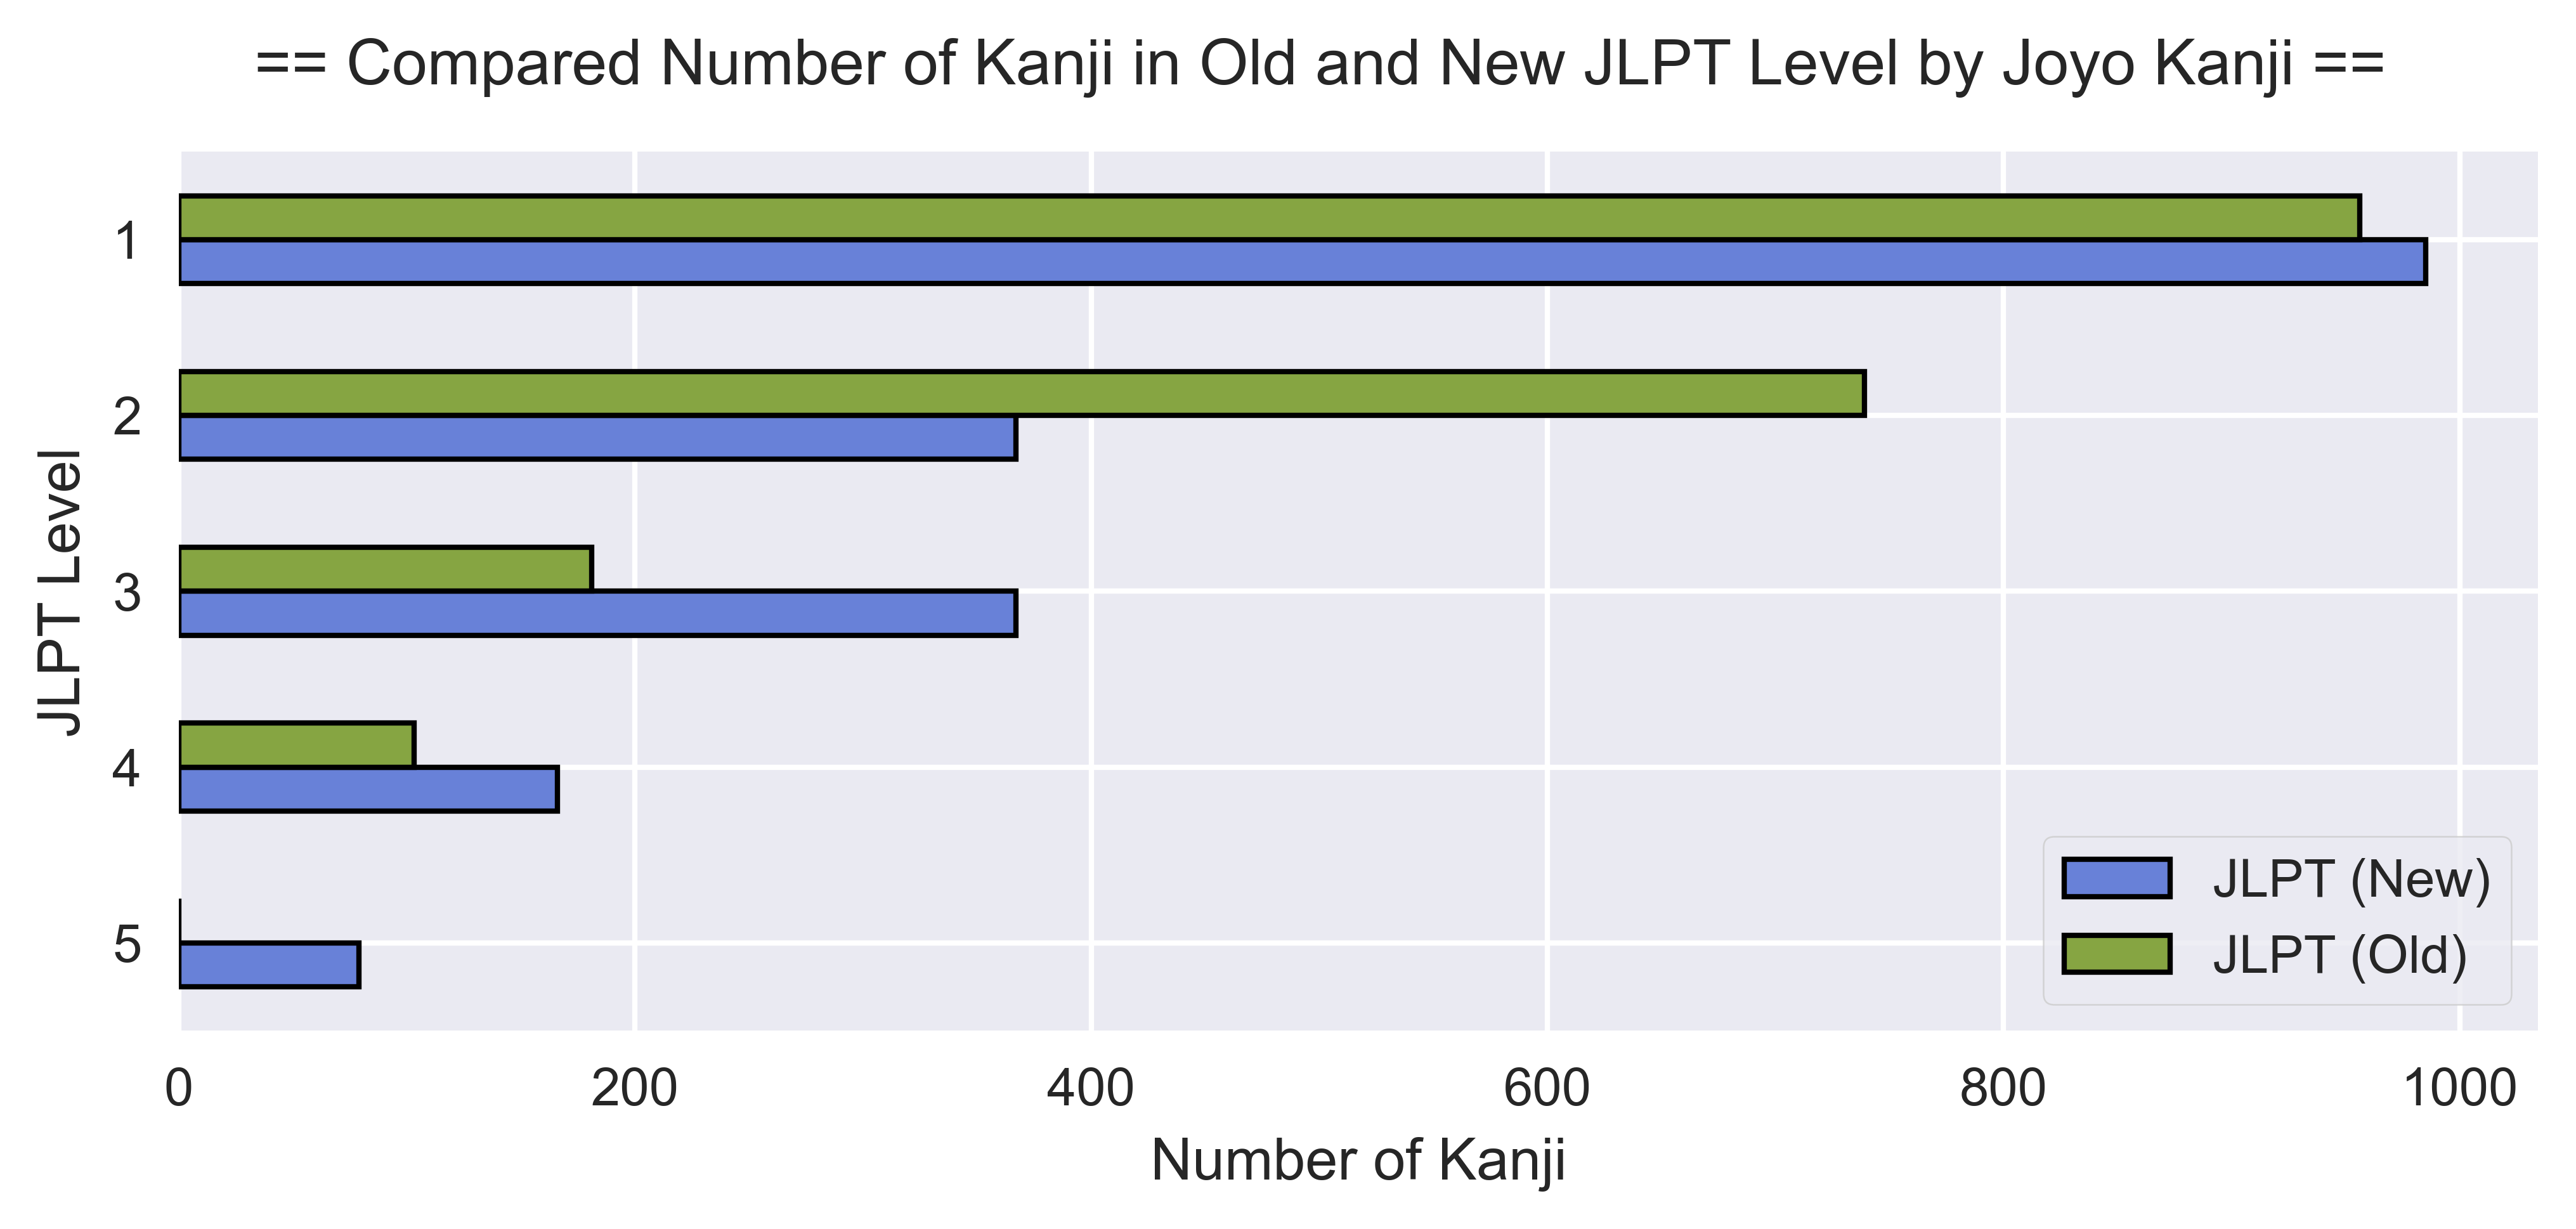

In [32]:
plt.figure(figsize=(8,3),dpi=600)
ax = plt.gca()

n_kanji.plot(kind='barh', ax=ax, color={'JLPT (Old)':'#86A542','JLPT (New)':'#6881D8'}, 
               edgecolor='black', linewidth=1, x='JLPT Level', xlabel='Number of Kanji')
plt.suptitle('== Compared Number of Kanji in Old and New JLPT Level by Joyo Kanji ==')
plt.xticks(rotation=0)
plt.legend(frameon=True)
plt.show

In [23]:
#ประเด็นที่ 3: จำนวนเส้นของคันจิมีความสอดคล้องกับระดับ JLPT หรือไม่
#ระดับ JLPT เหมาะแก่การศึกษาแบบเป็นขั้นลำดับหรือไม่?
stroke_box = m_kanji[['jlpt_new','Strokes']]
stroke_box

,jlpt_new,Strokes
0,5,1
1,5,2
2,5,2
3,5,2
4,5,2
...,...,...
2131,0,15
2132,0,14
2133,0,16
2134,0,13


Text(0, 0.5, 'Strokes')

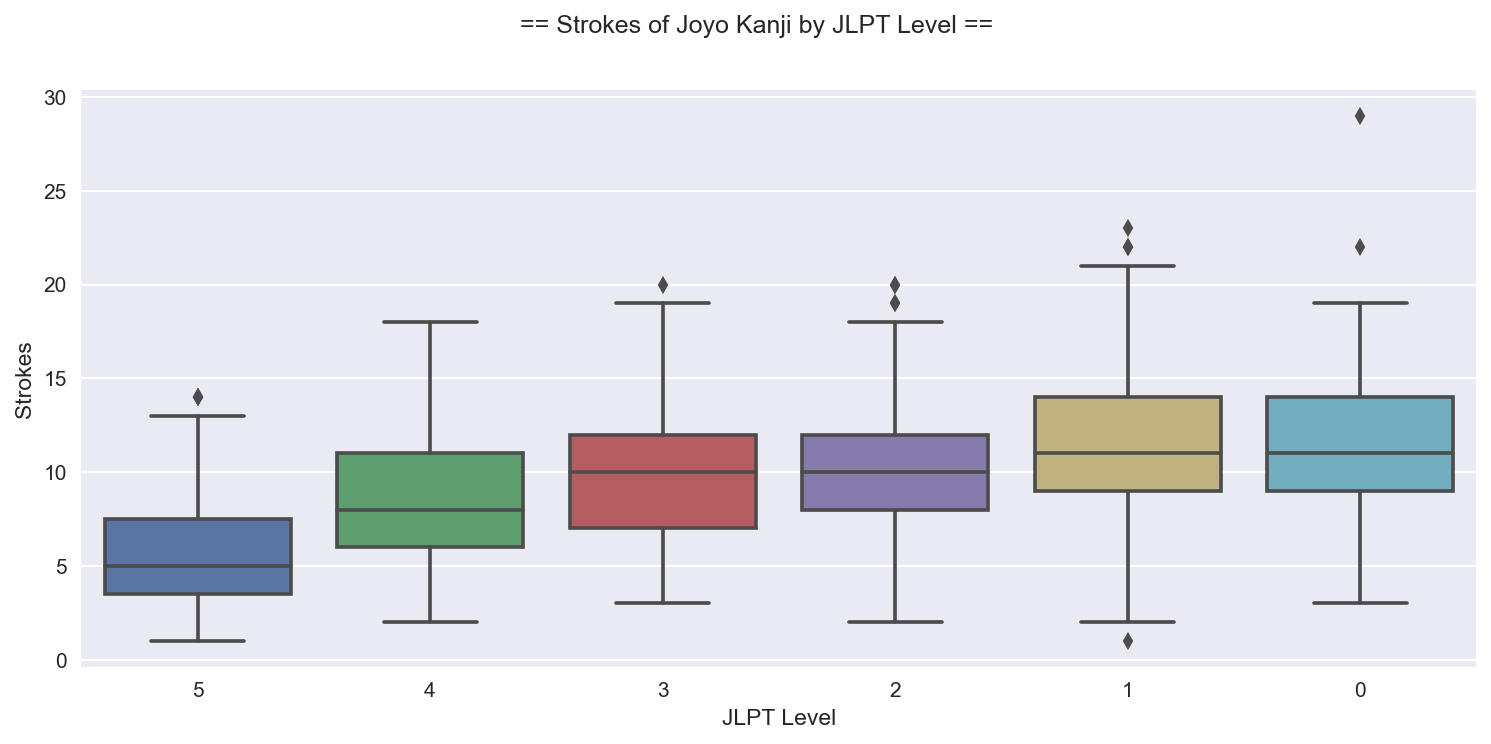

In [33]:
plt.figure(figsize=(12,5),dpi=150)
ax = plt.gca()

sns.boxplot(data=stroke_box, ax=ax, x='jlpt_new', y='Strokes', order=[5, 4, 3, 2, 1, 0])

plt.suptitle('== Strokes of Joyo Kanji by JLPT Level ==')
ax.set_xlabel('JLPT Level')
ax.set_ylabel('Strokes')

## 3.2 คันจิในชีวิตประจำวันกับเสียงอ่าน

In [25]:
#ประเด็นที่ 4: การกระจายตัวของจำนวนเสียงอง เสียงคุง มีลักษณะเป็นแบบใด?

s_onkun = m_kanji[['# of On','# of Kun within Joyo without inflections']]
s_onkun['Total Reading'] = s_onkun['# of On']+s_onkun['# of Kun within Joyo without inflections']

s_onkun = s_onkun['Total Reading'].value_counts().reset_index()
s_onkun.columns = ['Reading','Total Reading']
s_onkun.sort_values(['Reading'], ascending=[True],inplace=True)
s_onkun.reset_index(drop=True)

s_onkun

C:\Users\th100260\AppData\Local\Temp\ipykernel_28988\2369862013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_onkun['Total Reading'] = s_onkun['# of On']+s_onkun['# of Kun within Joyo without inflections']


,Reading,Total Reading
1,1,812
0,2,968
2,3,270
3,4,71
4,5,8
5,6,4
7,7,1
6,8,2


<function matplotlib.pyplot.show(close=None, block=None)>

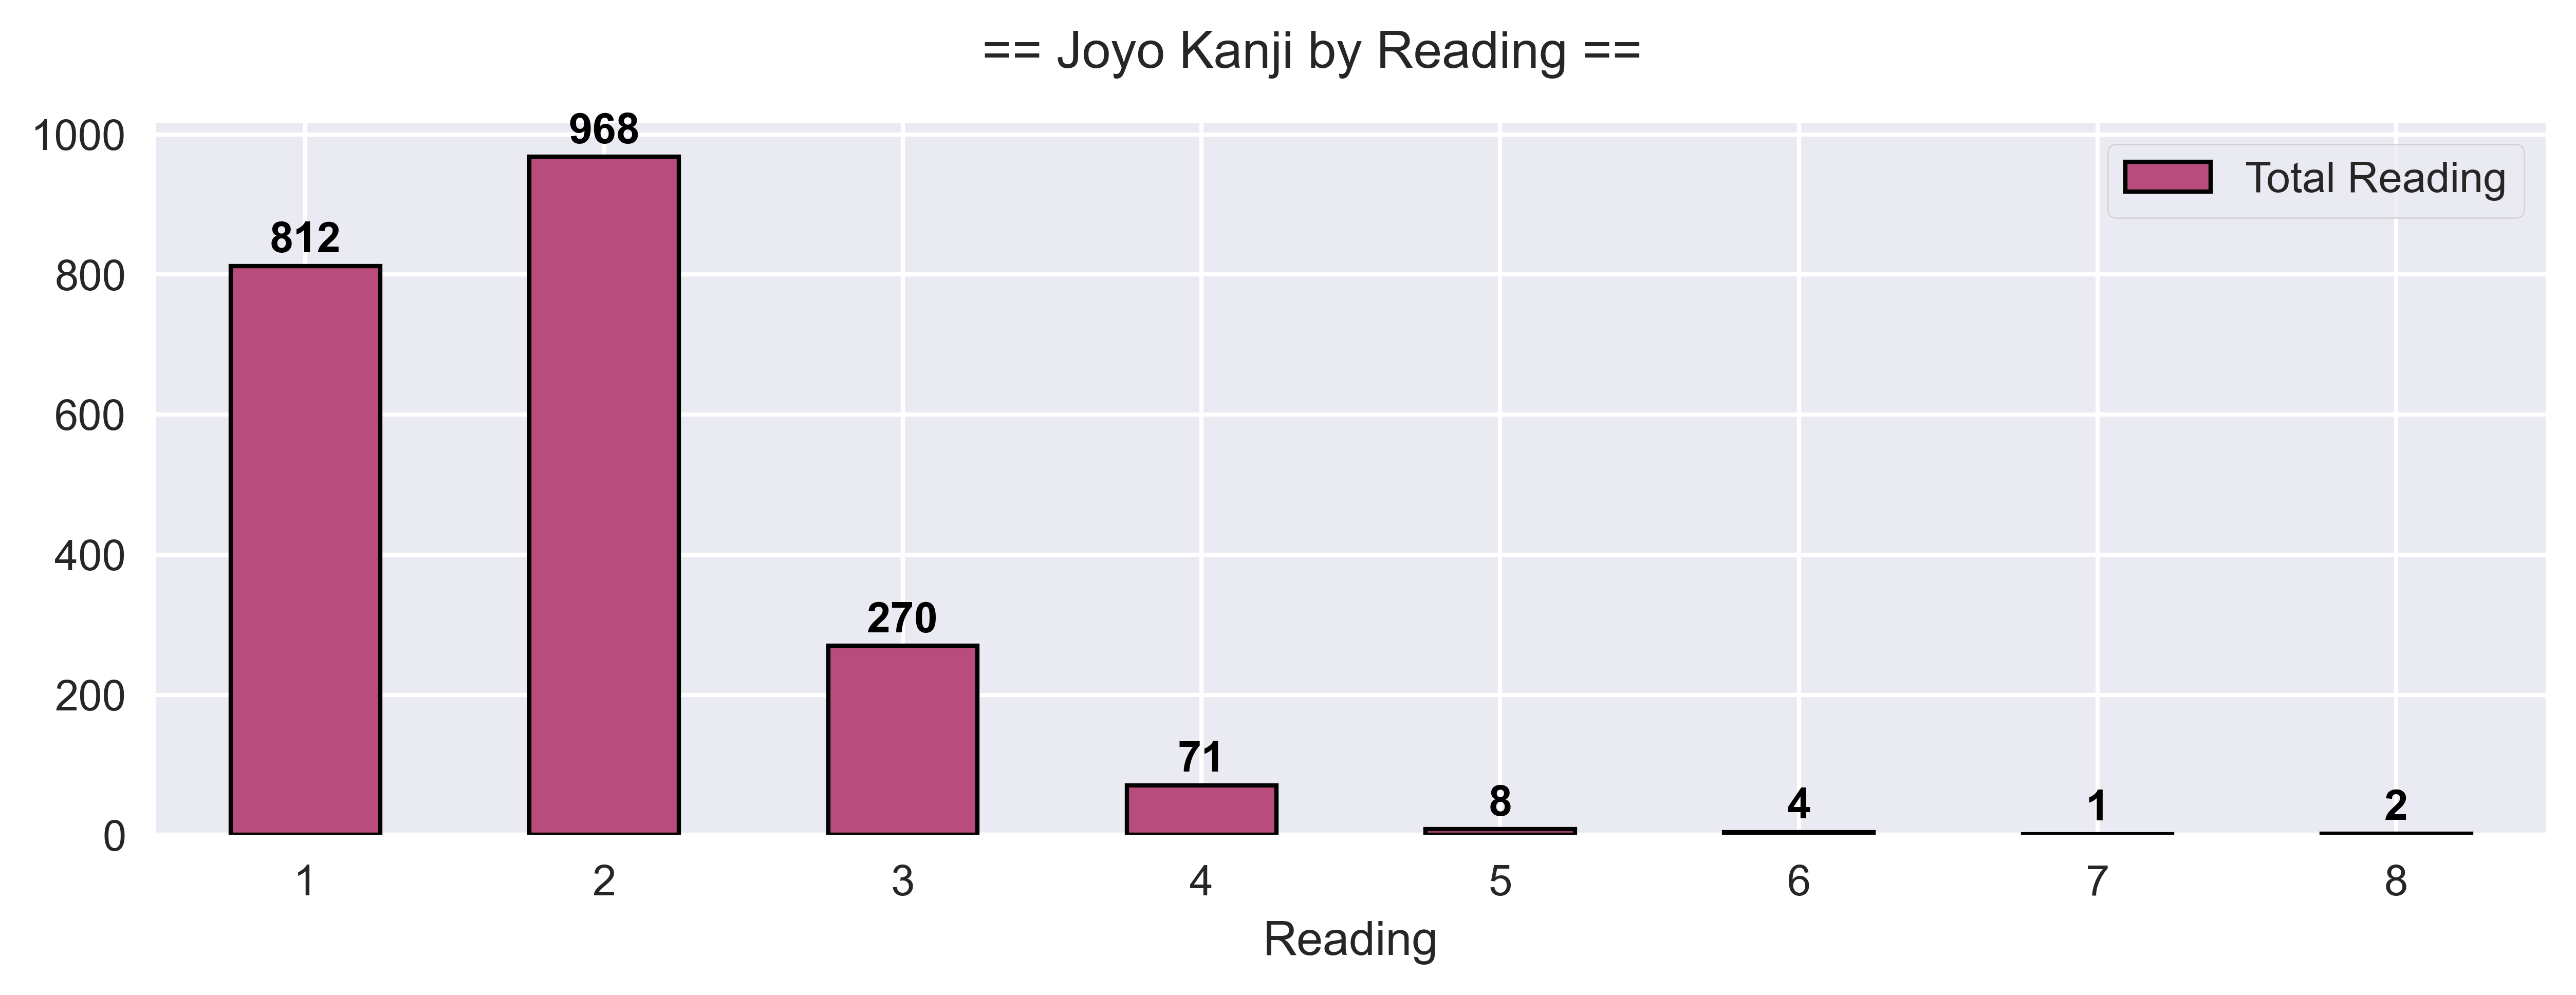

In [26]:
plt.figure(figsize=(10,3),dpi=600)
ax = plt.gca()

s_onkun.plot(kind='bar', ax=ax, x='Reading',y='Total Reading', color='#B84C7D',edgecolor='black', linewidth=1)
for i, v in enumerate(s_onkun['Total Reading']):
    ax.text(i, v + 20, str(v), ha='center', color='black', fontweight='bold')
plt.suptitle('== Joyo Kanji by Reading ==')
plt.xticks(rotation=0)
plt.legend(frameon=True)
plt.show

In [27]:
maxread = m_kanji.iloc[:,[0,9,11,17]]
maxread['Total Reading'] = maxread['# of On']+maxread['# of Kun within Joyo without inflections']
maxread = maxread[maxread['Total Reading']>=7]
maxread = maxread.iloc[:,[0,1,4]].reset_index(drop=True)
maxread.columns = ['Kanji','Reading','Total Reading']
maxread

C:\Users\th100260\AppData\Local\Temp\ipykernel_28988\2761329741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxread['Total Reading'] = maxread['# of On']+maxread['# of Kun within Joyo without inflections']


,Kanji,Reading,Total Reading
0,上,ジョウ、[ショウ]、うえ、[うわ]、かみ、あ-げる、あ-がる、のぼ-る、のぼ-せる、のぼ-す,7
1,下,カ、ゲ、した、しも、もと、さ-げる、さ-がる、くだ-る、くだ-す、くだ-さる、お-ろす、お-りる,8
2,生,セイ、ショウ、い-きる、い-かす、い-ける、う-まれる、う-む、お-う、は-える、は-やす、...,8


Text(583.3333333333333, 0.5, 'Number of On Reading')

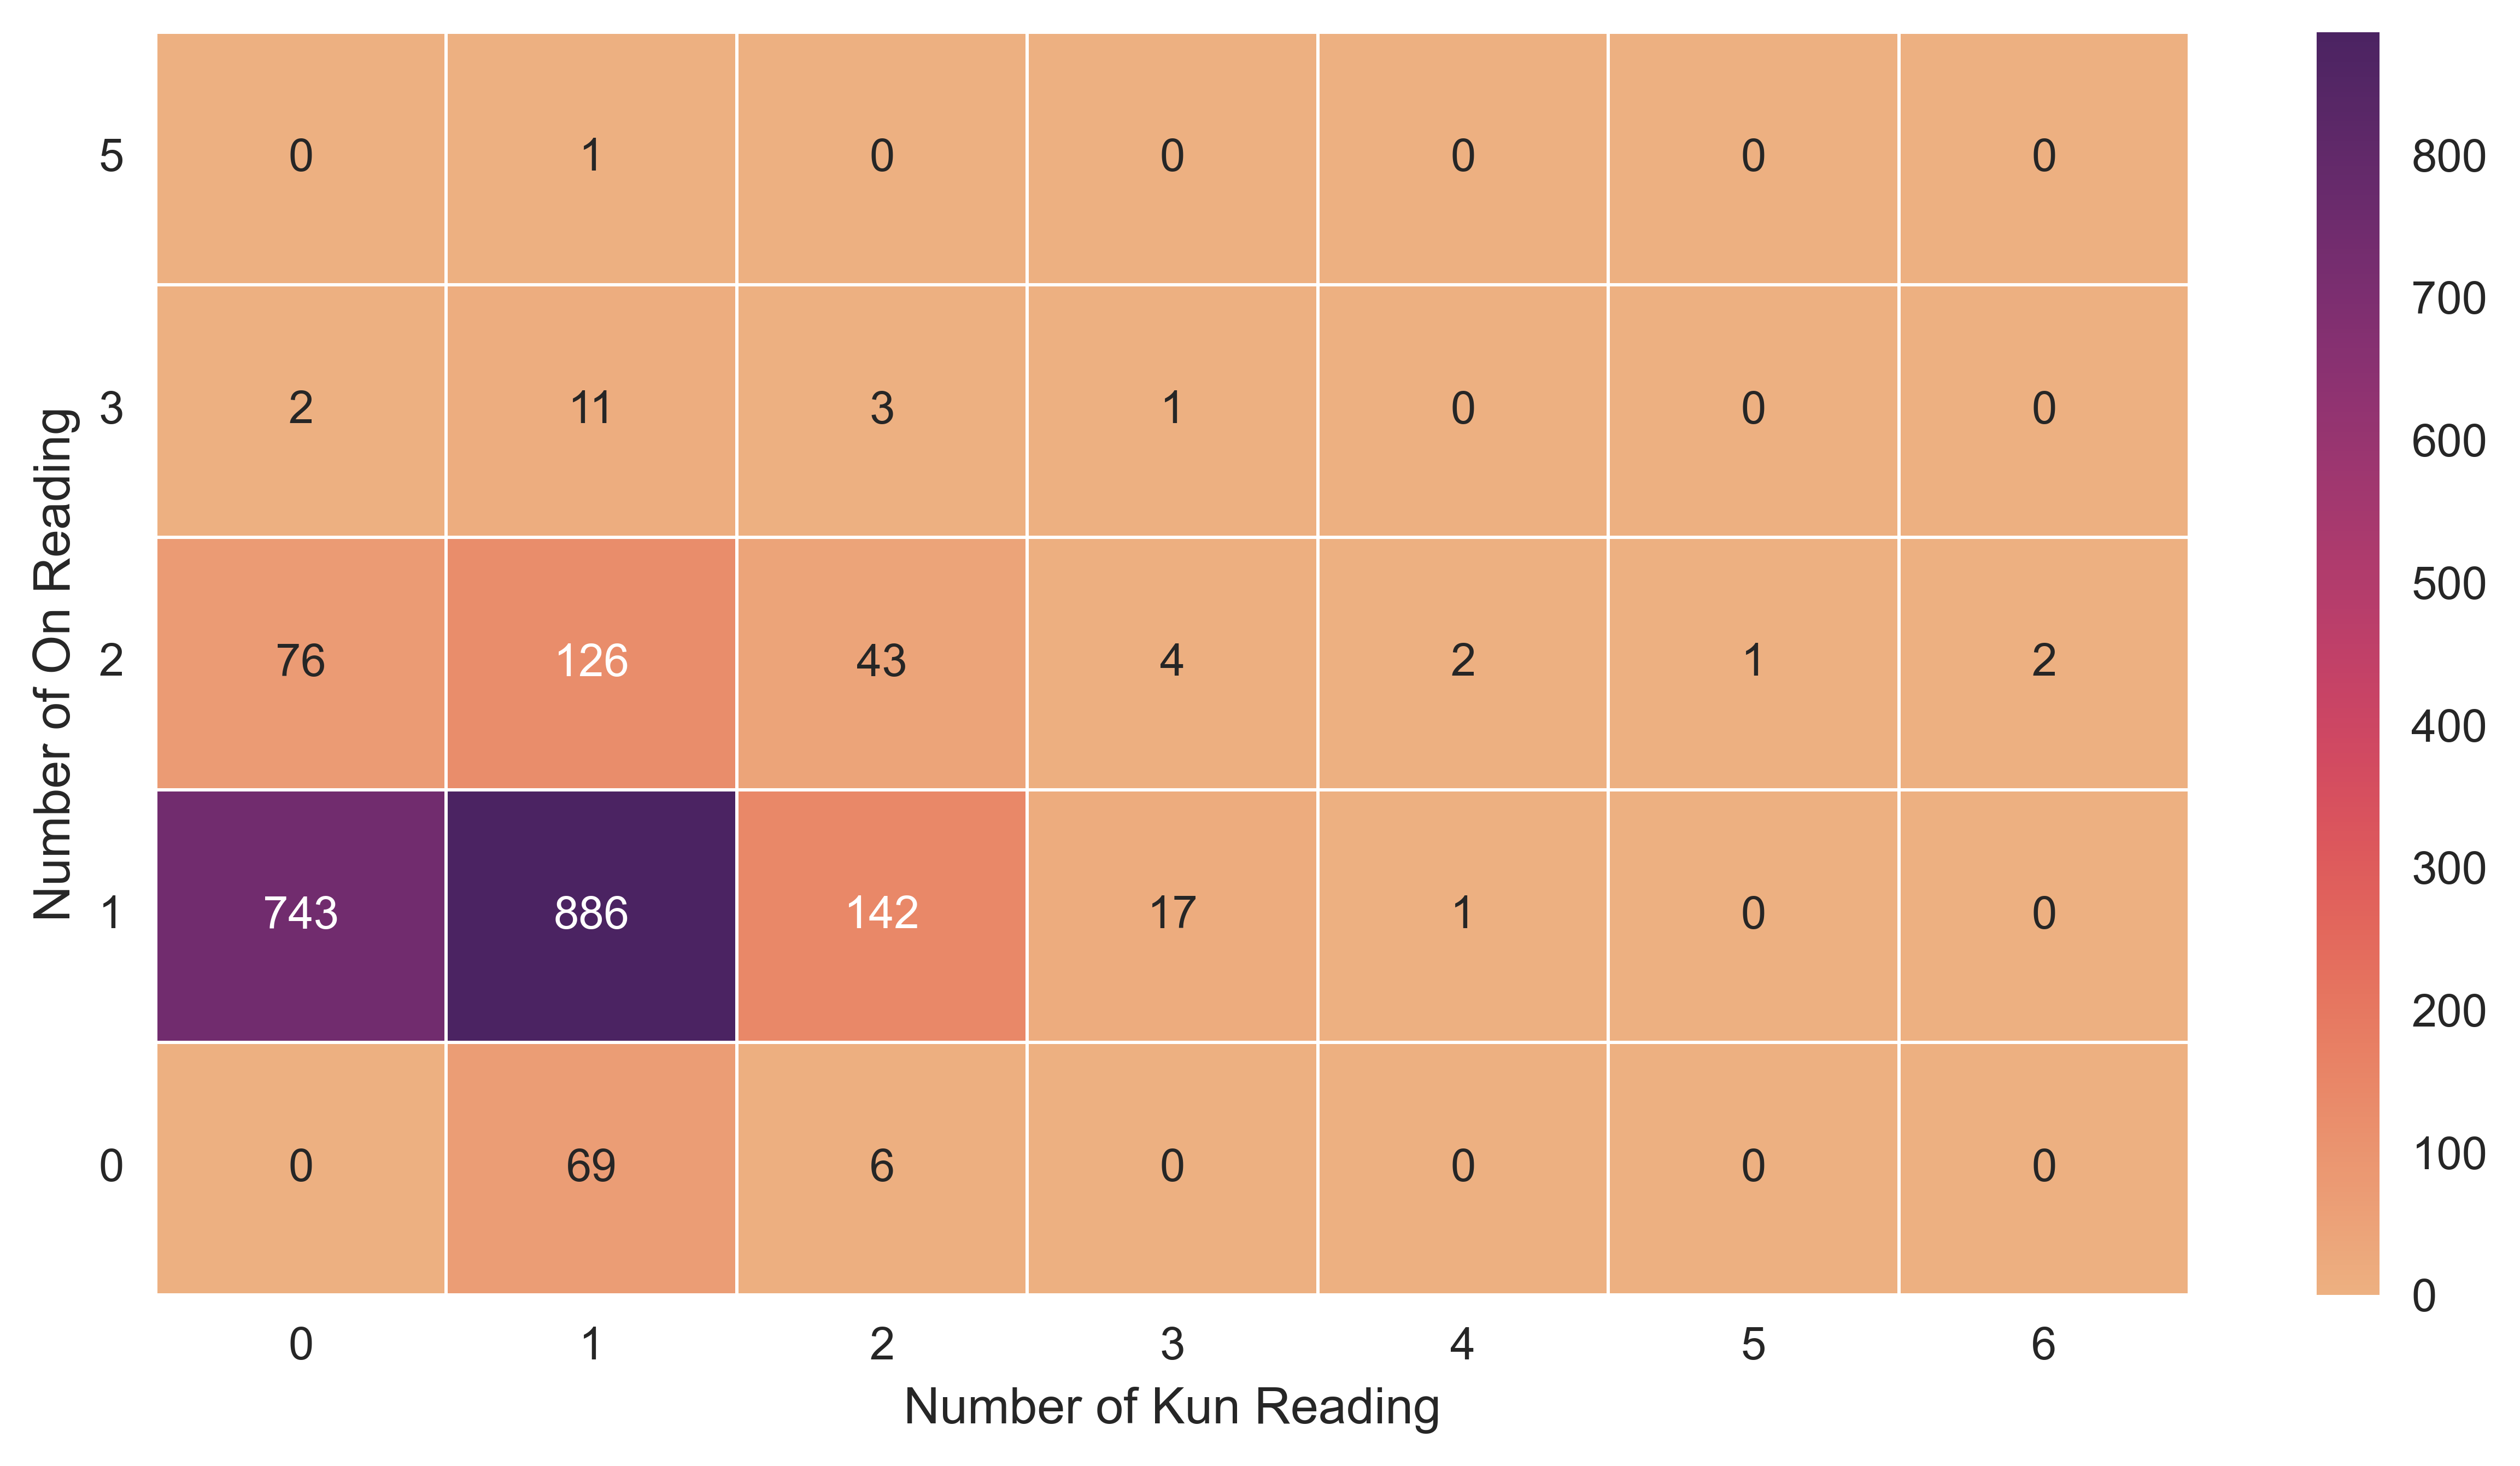

In [28]:
#ประเด็นที่ 5: การกระจายตัวของจำนวนเสียงอง เสียงคุง มีทิศทางที่จะเจอเสียงแบบนั้นมากกว่ากัน?

onkun = m_kanji[['# of On','# of Kun within Joyo without inflections']]
onkun = onkun.pivot_table(index='# of On', columns='# of Kun within Joyo without inflections', aggfunc=len, fill_value=0)
onkun = onkun.reindex(index=list(reversed(onkun.index)))

plt.figure(figsize=(10,5),dpi=600)

sns.heatmap(onkun, annot=True, fmt='g', cmap='flare', linewidths=.5)

plt.yticks(rotation=0)
plt.xlabel('Number of Kun Reading')
plt.ylabel('Number of On Reading')

## 3.3 คันจิในชีวิตประจำวันกับคำผสมคันจิ 2 ตัว

In [29]:
#รีวิวข้อมูลจากชุดข้อมูลที่ต้องการจะใช้
jukugo

,id,Comp. Word,Frequency,Grammatical Feature,Pronunciation,English Translation
0,1,問題,238663,adjective stem for -nai negation,mondai,question
1,2,首相,224822,general noun,syusyoo,Prime Minister
2,3,写真,211918,general noun,syasin,photograph
3,4,現在,193742,possible to use as an adverb,genzai,now
4,5,世界,183195,general noun,sekai,the world
...,...,...,...,...,...,...
27945,27946,驥尾,1,general noun,kibi,leader
27946,27947,髀肉,1,general noun,hiniku,round meat
27947,27948,髷物,1,general noun,magemono,period play
27948,27949,鹵獲,1,light-verb -suru attached,rokaku,capture


Text(0.5, 0.98, '== Frequency of Jukugo appeared in Mainichi Newspaper (2000-2010) ==')

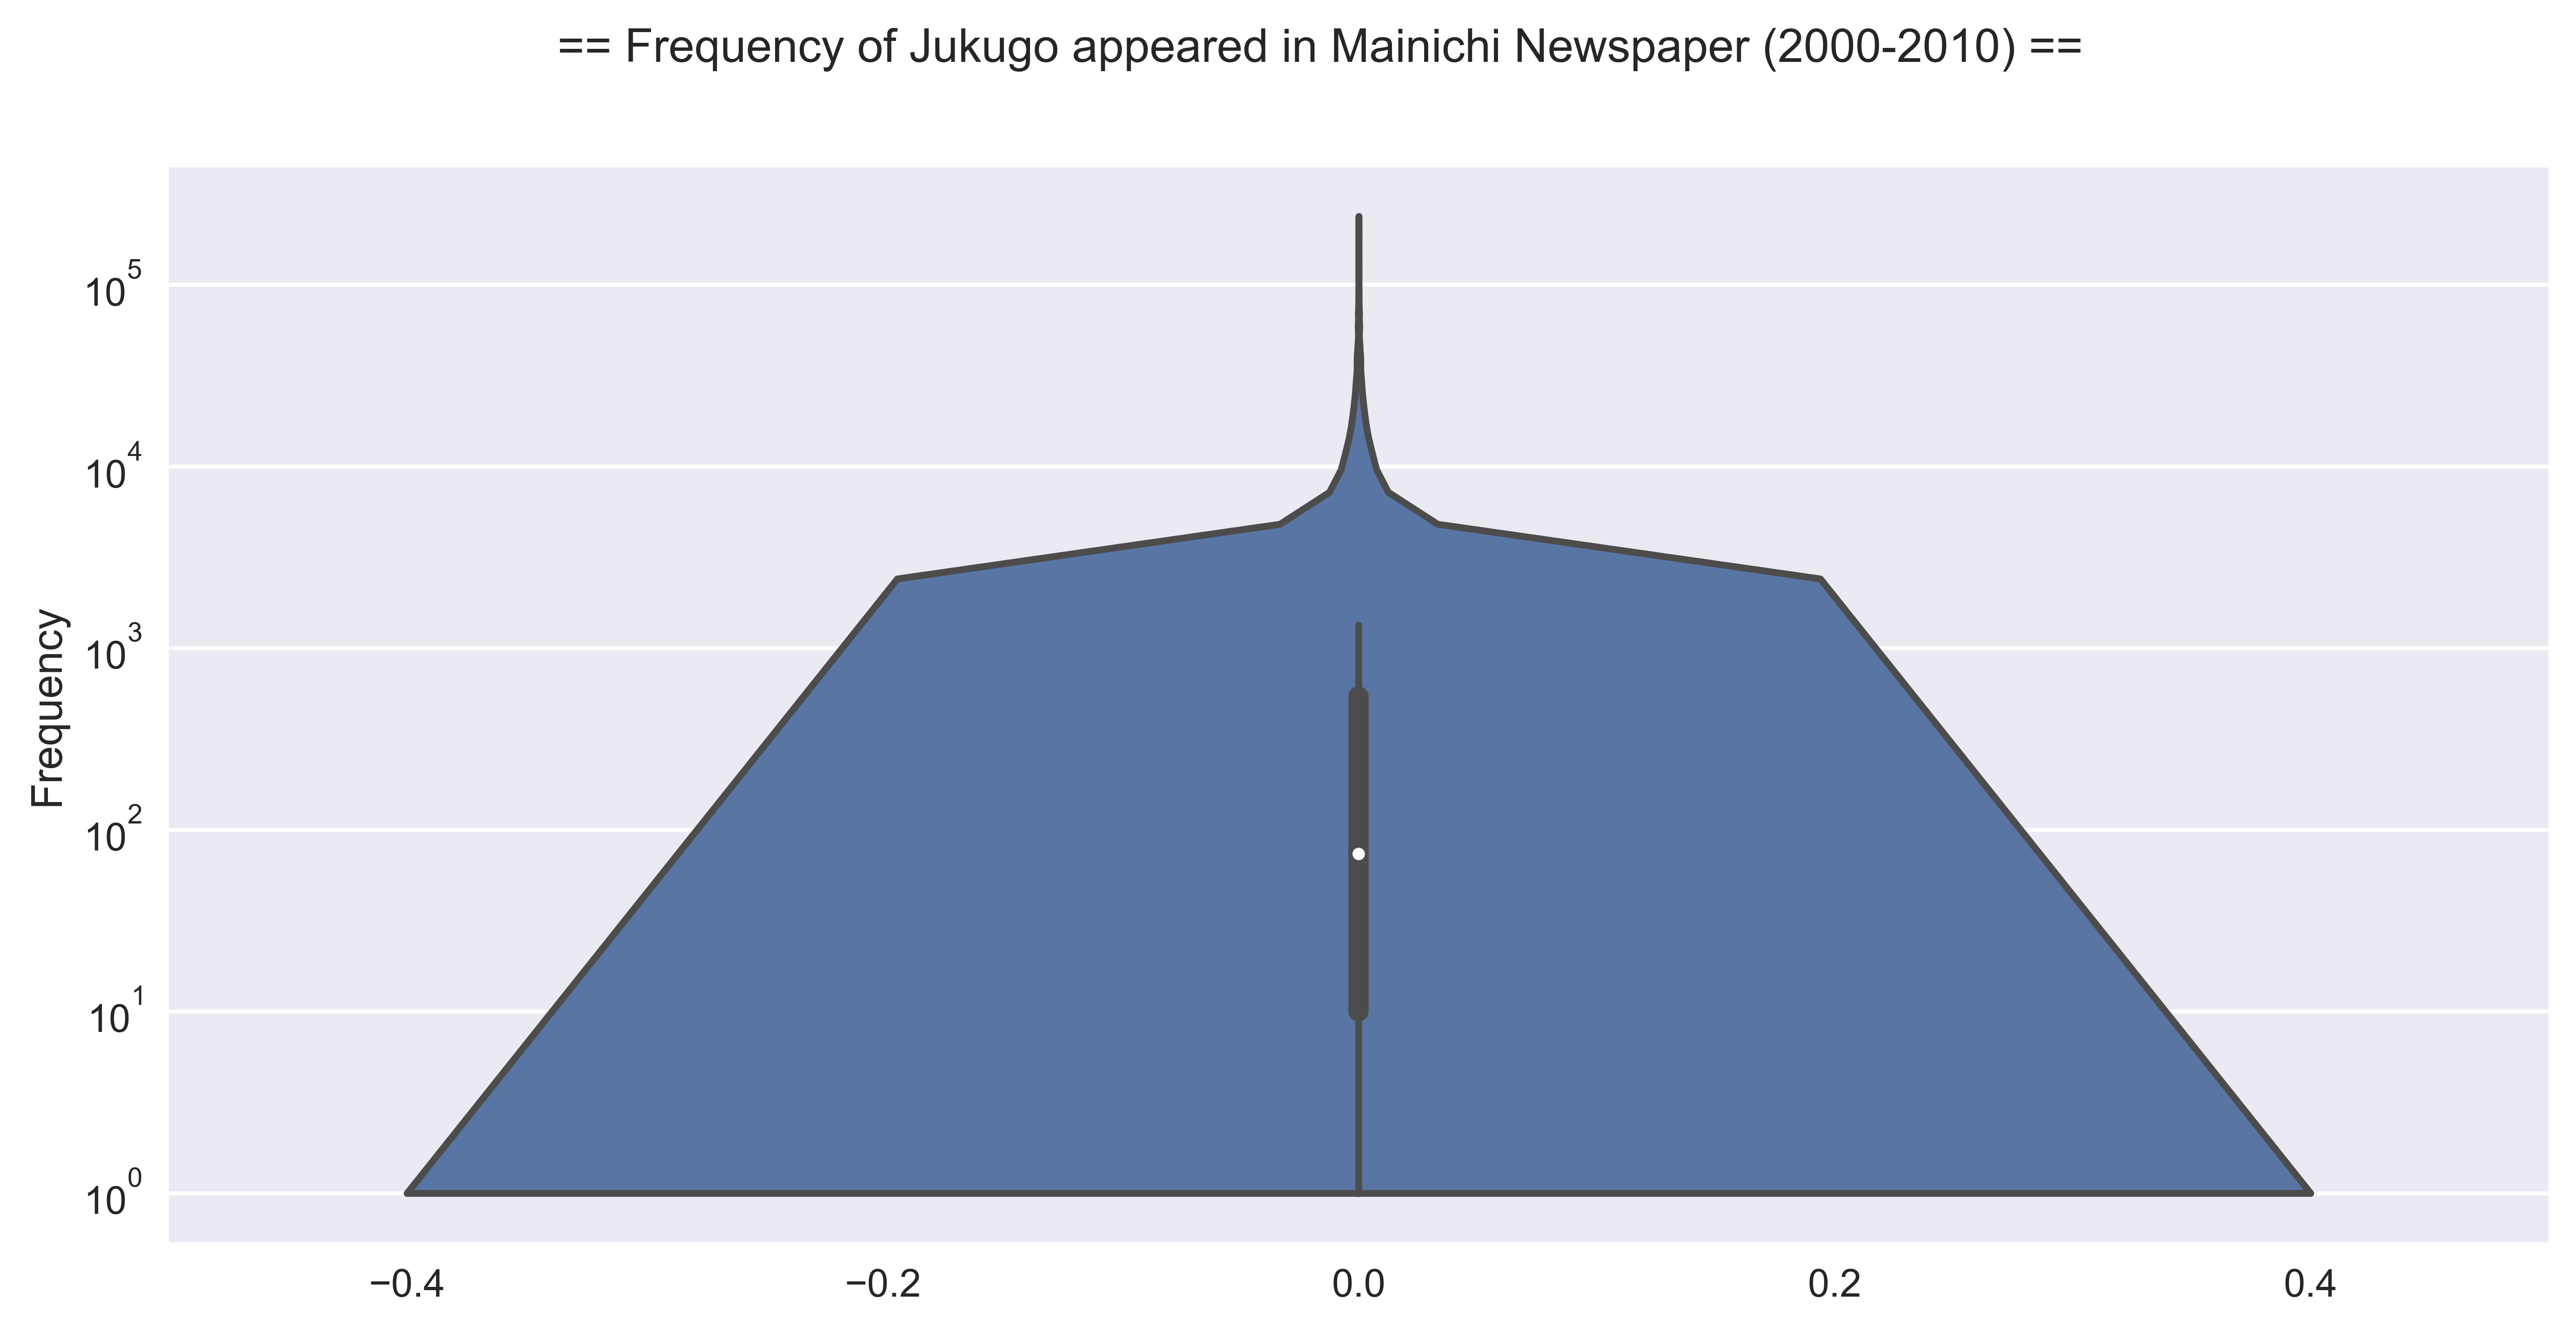

In [75]:
#ประเด็นที่ 6: หนังสือพิมพ์ไมนิจิมีความถี่ในการปรากฎตัวซ้ำๆของคันจิผสม 2 ตัวมากน้อยเพียงใด?

plt.figure(figsize=(11,5),dpi=600)
sns.violinplot(y=jukugo['Frequency'], scale='count', cut=0, bw=0.2)

plt.yscale('log')
plt.xscale('linear')
plt.suptitle('== Frequency of Jukugo appeared in Mainichi Newspaper (2000-2010) ==')

In [31]:
jukugo['Frequency'].describe()

count     27950.000000
mean       1818.017424
std        8235.971294
min           1.000000
25%          10.000000
50%          74.000000
75%         543.750000
max      238663.000000
Name: Frequency, dtype: float64